[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_8_pandas_estatistica.ipynb)

In [1]:
# Para mostrar as imagens com DPI de alta qualidade
%matplotlib inline
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 300

# `pandas` estatística

**Objetivo**: Apresentar o que é estatística pela biblioteca pandas. Abordar quantis, média, mediana, desvio padrão, assimetria, curtose, correlação, covariância.

# Estatística

* média
* mediana
* moda
* desvio padrão
* quantis
* assimetria
* curtose
* correlação

## Média (*inglês: Mean*)

Valor central de um conjunto discreto de números. Especificamente, a soma dos números divido pela quantidade de números. Geralmente média é denominada como $\bar{x}$ ou a letra grega $\mu$.

$\bar{x}=\frac{1}{n}\left(\sum_{i=1}^{n} x_{i}\right)=\frac{x_{1}+x_{2}+\cdots+x_{n}}{n}$

## Mediana (*inglês: Median*)

Valor que separa a metade maior e a metade menor de uma amostra, uma população ou uma distribuição de probabilidade. Num conjunto de dados, pode ser pensada como o valor do "meio".

$\operatorname{mediana}(a)=\frac{a_{\lfloor (\# a+1) \div 2 \rfloor} + a_{\lceil (\# a+1) \div 2 \rceil}}{2}$,

onde $a$ é um lista ordenada de números, $\#a$ o comprimento dessa lista, $\lfloor . \rfloor$ o valor arredondado para baixo, $\lceil . \rceil$ o valor arredondado para cima.


## Moda (*inglês: Mode*)

Valor mais frequente de uma amostra, uma população, ou uma distribuição de probabilidade.

<img src="images/media_mediana_moda.png" alt="media-mediana-moda" style="width: 300px;"/>

<img src="images/renda-media-mediana.png" alt="renda-media-mediana" style="width: 600px;"/>

## Desvio Padrão (*inglês: Standard Deviation*)

Medida de quanto variação ou disperção um conjunto de valores possui. Geralmente representada com a letra gregra $\sigma$. É a raiz quadrada da soma dos desvios (em relação à media - $x_i - \bar{x}$) de uma amostra dívido pelo número total da amostra menos um ($N-1$).

$\sigma = \sqrt{\frac{\sum_{i=1}^{N}\left(x_{i}-\bar{x}\right)^{2}}{N-1}}$

É importante porque, **em uma distribuição normal**, os intervalos contém um percentual da população

* $\mu \pm 1 \times \sigma \approx 68\%$
* $\mu \pm 2 \times \sigma \approx 95\%$
* $\mu \pm 3 \times \sigma \approx 69\%$


<img src="images/desvio_padrão.png" alt="desvio_padrão" style="width: 600px;"/>

## Distribuição Normal

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

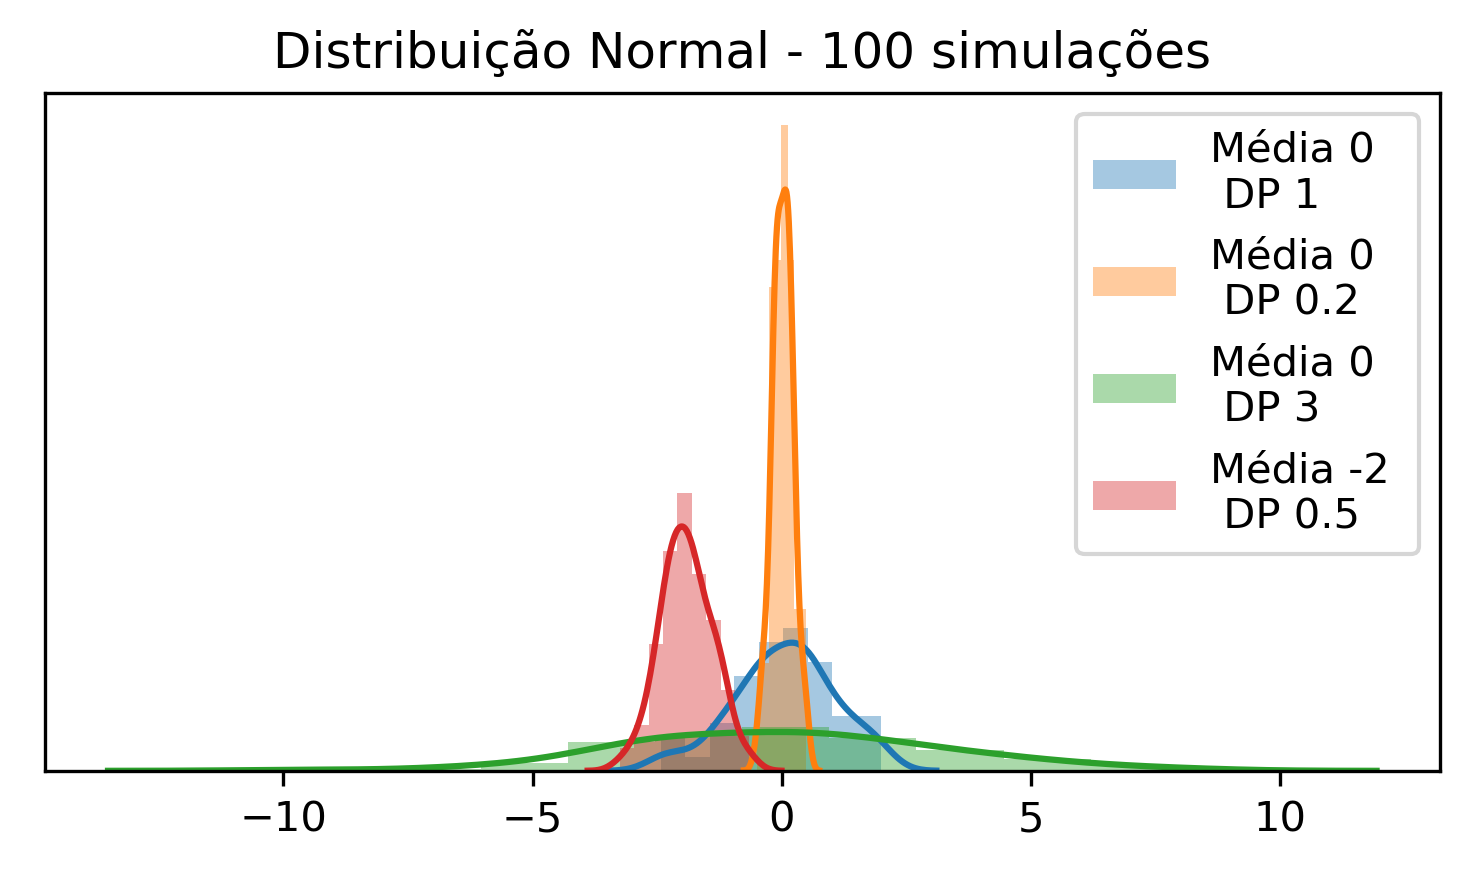

In [3]:
f, axes = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
size = 100
for mean, std in [(0, 1), (0, 0.2), (0, 3), (-2, 0.5)]:
    data = norm.rvs(mean, std, size=size)
    sns.distplot(data, label=f"Média {mean} \n DP {std}")

title = f"Distribuição Normal - {size} simulações"
plt.title(title)
axes.legend()
plt.setp(axes, yticks=[])
plt.tight_layout()

## Quantis / Percentis

Um percentil (ou um centil) é uma medida usada nas estatísticas indicando o valor abaixo do qual uma determinada porcentagem de observações em um grupo de observações cai. Por exemplo, o 20º percentil é o valor (ou pontuação) abaixo do qual 20% das observações podem ser encontradas.

* 100-quantis são chamados *percentis*
* 12-quantis são chamados *duo*-deciles
* 10-quantis são chamados *decis*
* 5-quantis são chamados *quintis* 
* 4-quantis são chamados *quartis*
* 3-quantis são chamados *tercis*

### Quartis (Q1, Q2, Q3, Q4)

O mais utilizado em ciência de dados

<img src="images/quantis-normal.png" alt="quantis=normal" style="width: 600px;"/>

## Assimetria (*inglês: Skewness*)

Medida da falta de simetria de uma determinada distribuição probabilística.

* $>0$ - Assimetria Positiva - Cauda direita - valores acima da média mais pesada
* $<0$ - Assimetria Negativa - Cauda esquerda - valores abaixo da média mais pesada
* $0$ - Simetria - Mesmo que uma distribuição Normal

<img src="images/assimetria2.png" alt="assimetria" style="width: 600px;"/>

## Curtose (*inglês: Kurtosis*)

Curtose é uma medida de forma que caracteriza o achatamento da curva de uma distribuição probabilística.

* $3$ - Mesocúrtica (Mesmo que uma distribuição Normal)
* $< 3$ - Platicúrtica (mais "achatada" que a distribuição Normal)
* $> 3$ - Leptocúrtica (mais "alta" e "afunilada" e concentrada que a distribuição Normal)

<img src="images/curtose.png" alt="curtose" style="width: 600px;"/>

## Correlação (*inglês: Correlation*)

Qualquer relação estatística (causal ou não causal) entre duas variáveis. Varia entre $-1$ e $1$:

* 0 - Nenhuma correlação
* 1 - Correlação/Associação positiva perfeita
* 2 - Correlação/Associação negativa perfeita

<img src="images/correlação.png" alt="correlação" style="width: 600px;"/>

* Primeira Fileira: Exemplos de correlações entre $-1$ e $1$
* Segunda Fileira: Correlação não altera a inclinação (*slope*) entre duas variáveis
* Terceira Fileira: Exemplos de relações não-lineares (Correlação é $0$)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

## Dataset [*Iris*](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Edgar Anderson coletou os dados para quantificar a variação morfológica das flores de íris de três espécies relacionadas.

O conjunto de dados consiste em 50 amostras de cada uma das três espécies de Iris  (Setosa, Virginica e Iris Versicolor). Quatro características foram medidas em cada amostra (cm):

* comprimento das sépalas
* largura  das sépalas
* comprimento das pétalas
* largura das pétalas

<img src="https://thegoodpython.com/assets/images/iris-species.png" alt="iris-sepals-petals" style="width: 600px;"/>

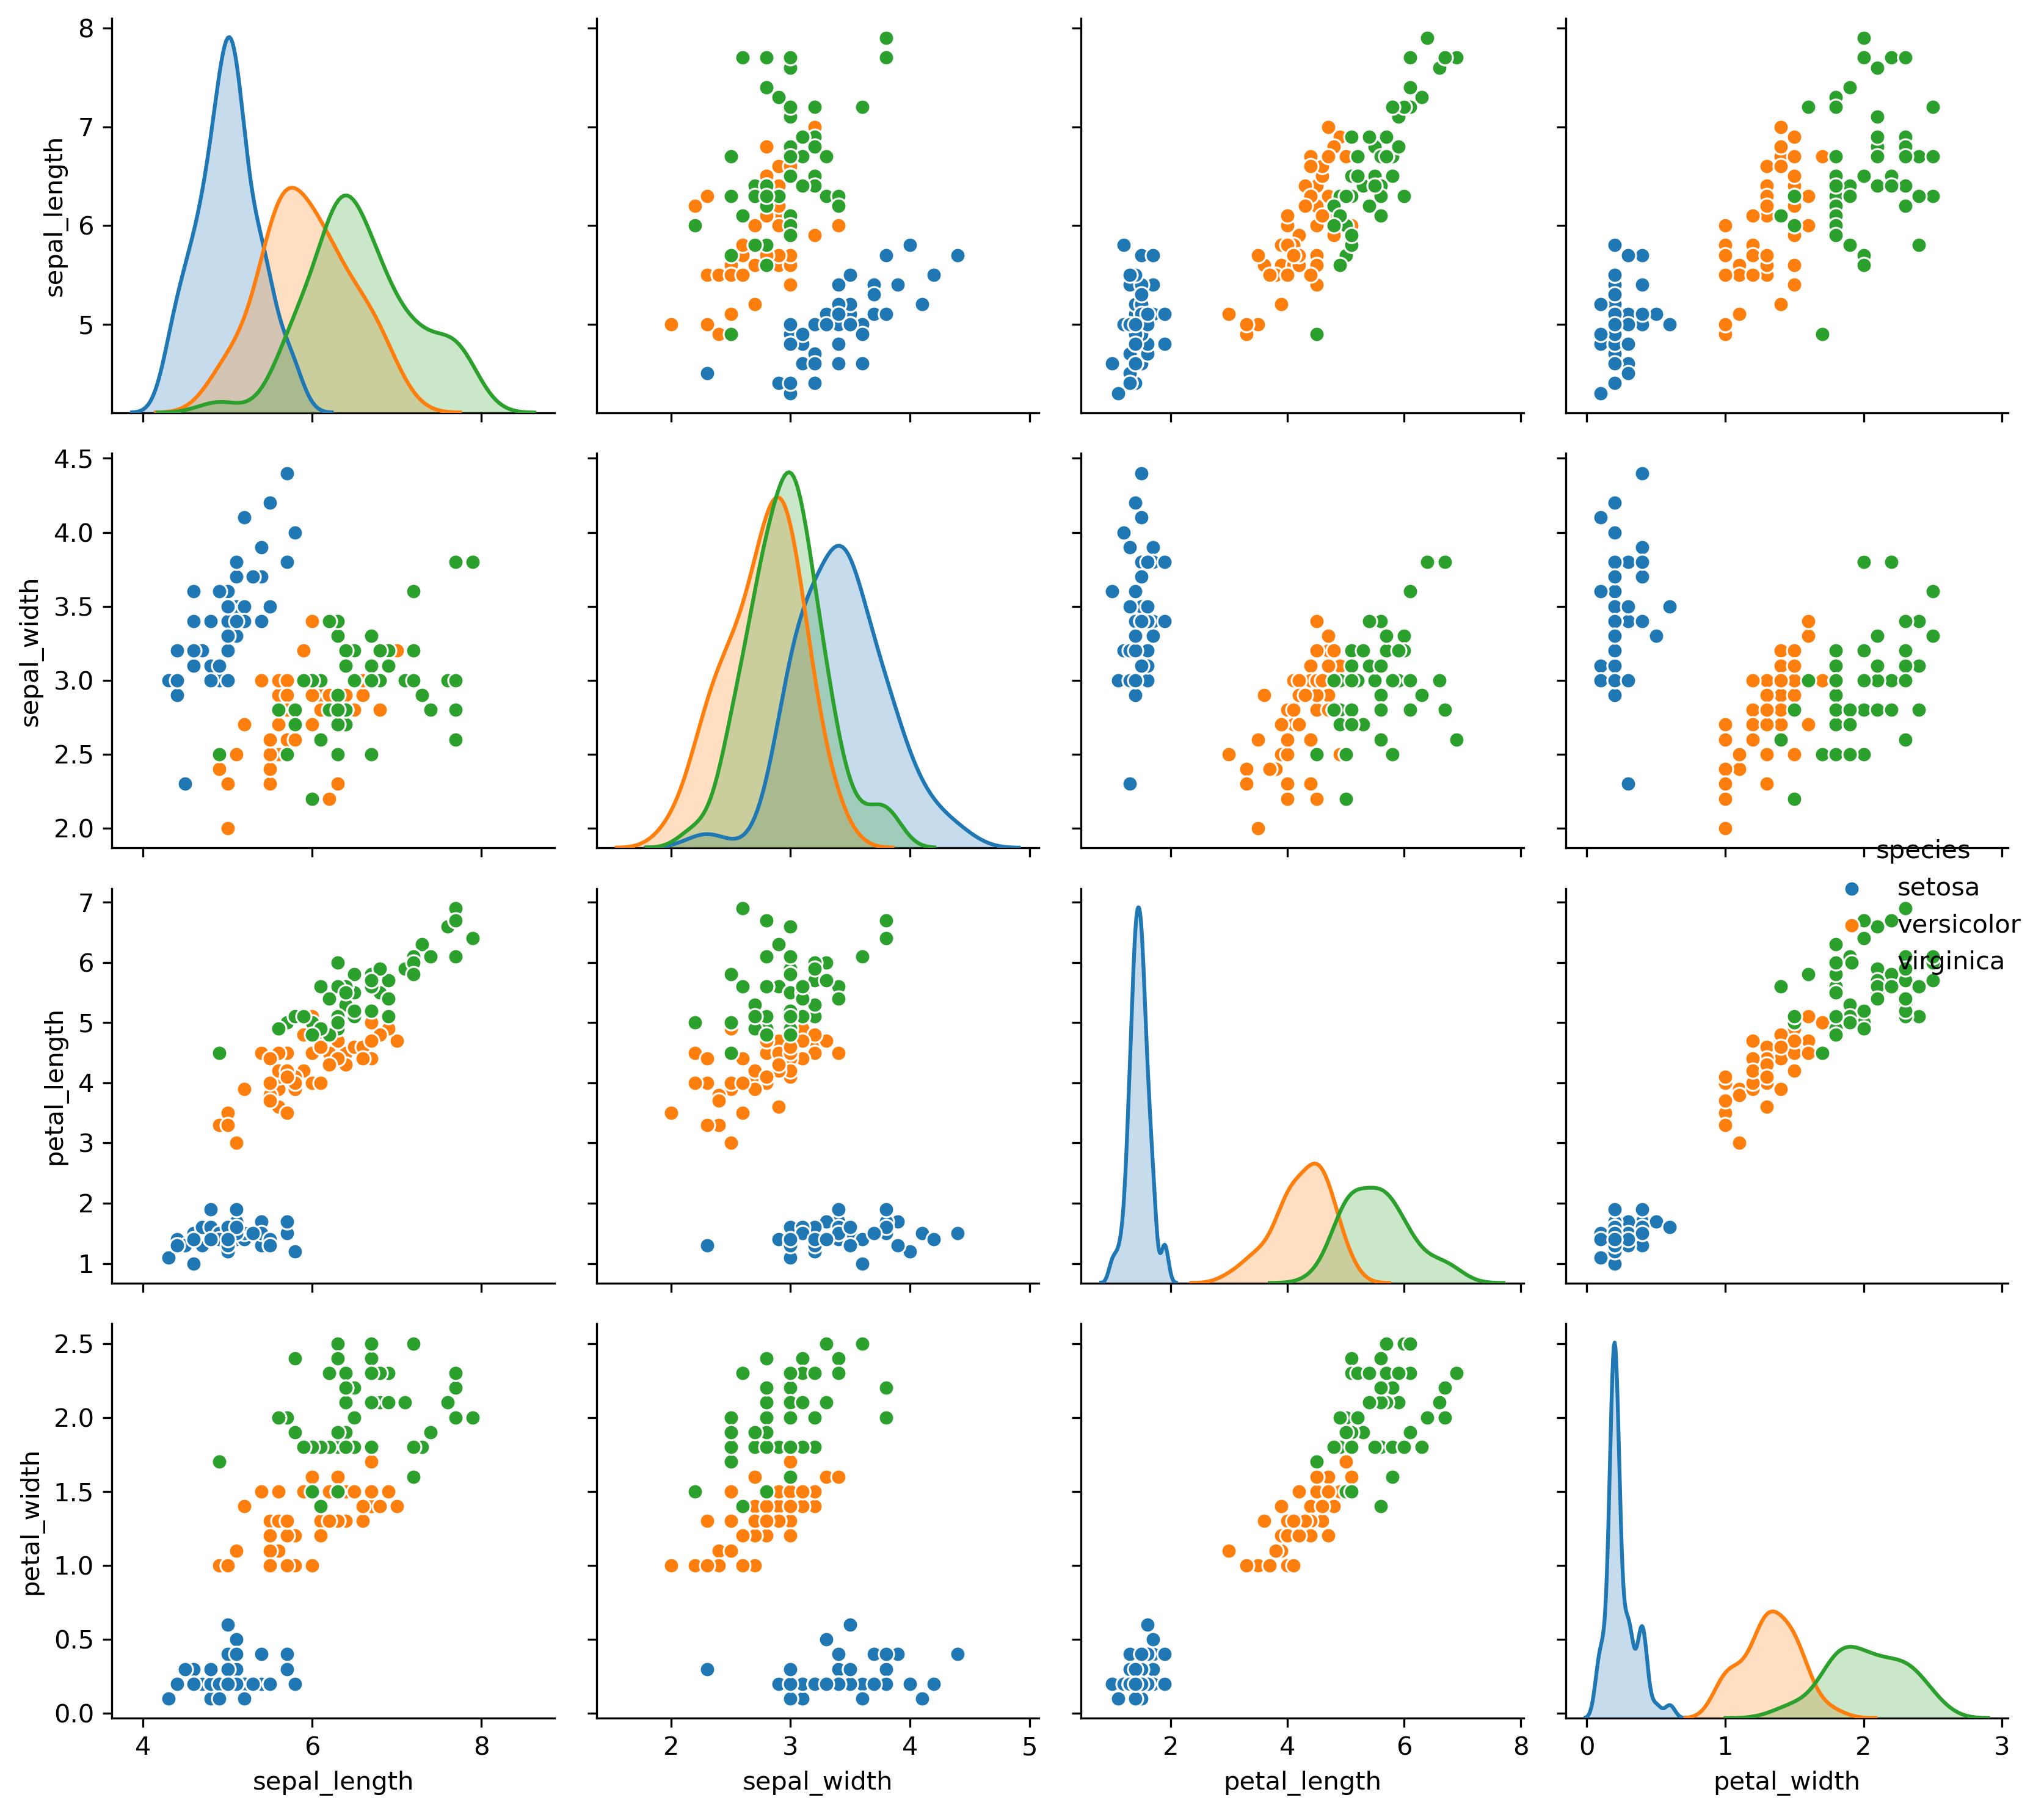

In [5]:
sns.pairplot(iris, hue='species')
plt.tight_layout()

## Dataset Titanic

Contém 891 passageiros reais do Titanic que afundou em 15/04/1912 matando 1502 de 2224 passageiros e tripulação que estavam a bordo.

* `survived`: *dummy* `0` ou `1` 
* `pclass`: Classe do Passageiro
    - `1`: Primeira Classe
    - `2`: Segunda Classe
    - `3`: Terceira Classe
* `sex`: Sexo `male` ou `female`
* `age`: Idade
* `sibsp`: Número de Irmãos (*Siblings*) e Esposas (*spouse*) a bordo
* `parch`: Número de pais/filhos a bordo
* `fare`: Valor pago pela passagem em libras
* `embarked`: Porto que embarcou
    - `C`: Cherbourg
    - `Q`: Queenstown
    - `S`: Southampton)
* `class`: Mesmo que `pclass` só que em texto
* `adult_male`: *dummy* para `age > 16` e `sex == 'male'`
* `deck`: Qual deck a cabine do passageiro se situava
* `alive`: Mesmo que survived só que com `yes` ou `no`
* `alone`: *dummy* para se viajava sozinho

In [6]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Pandas Estatísticas Descritivas

* `.min()`: mínimo
* `.max()`: máximo
* `.quantile(q=0.5)`: quantil (padrão `0.5`)
* `.sum()`: soma
* `.mean()`: média
* `.median()`: mediana
* `.mode()`: moda
* `.std()`: desvio padrão
* `.skew()`: assimetria
* `.kurt()`: curtose

In [7]:
print(titanic['age'].mean())
print(titanic['age'].median())

29.69911764705882
28.0


## Pandas Descritivos não-estatísticos

* `unique()`: valores únicos
* `value_counts()`: contagem de valores únicos

In [8]:
titanic['class'].unique()

[Third, First, Second]
Categories (3, object): [Third, First, Second]

In [9]:
titanic['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

## Pandas `.describe()`

Traz estatísticas descritivas do *DataFrame* em formato de *DataFrame*. Por padrão exclui os `NaN` e `NA`. Para cada variável/coluna:

* `count`: contagem das observações
* `mean`: média
* `std`: desvio padrão
* `min`: mínimo
* `25%`: quartil Q1 (até 25%)
* `50%`: quartil Q2 (até 50%)
* `75%`: quartil Q3 (até 75%)
* `max`: máximo

In [10]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Pandas `.corr()`

Traz correlações do *DataFrame* em formato de *DataFrame*. Por padrão exclui os `NaN` e `NA`. O output é um *DataFrame* quadrado $n \times n$ onde $n$ é o número de variáveis/colunas.

In [11]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


## Pandas `.groupby`

*Pão com Manteiga* da análise de dados com pandas. Usado em situações que você quer dividir os dados em grupos e fazer *algo* com esses grupos.

Usa os seguintes argumentos:

* `by`: determina os grupos (chamados de *keys*), pode ser uma coluna específica ou uma lista de colunas
* `axis`: qual a lógica da quebra, `0` para linhas ou `1` para colunas. Padrão é `0`

Retorna um objeto chamado *DataFrameGroupBy* que pode ser usado com os seguintes métodos:

| Nome da Função       | Descrição                            |
| -------------------  | ------------------------------------ |
| `count()`            | Número de valores não-NA             |
| `sum()`              | Soma de valores não-NA               |
| `mean()`             | Média de valores não-NA              |
| `median()`           | Mediana Aritmética de valores não-NA |
| `std()`              | Desvio padrão de valores não-NA      |
| `min()`, `max()`     | Mínimo e Máximo de valores não-NA    |
| `first()`, `last()`  | Primeiro e Último de valores não-NA  |

![pandas-groupby](https://static.packt-cdn.com/products/9781783985128/graphics/5128OS_09_01.jpg)

### Exemplo: Uma *key* somente - média

In [14]:
titanic.groupby('sex').mean()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


### Exemplo: Uma *key* somente - contagem

In [15]:
titanic.groupby('sex').count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


### Exemplo: Múltiplas *keys* - média

In [16]:
titanic.groupby(['sex', 'survived']).mean()

pclass        age     sibsp     parch       fare  \
sex    survived                                                       
female 0         2.851852  25.046875  1.209877  1.037037  23.024385   
       1         1.918455  28.847716  0.515021  0.515021  51.938573   
male   0         2.476496  31.618056  0.440171  0.207265  21.960993   
       1         2.018349  27.276022  0.385321  0.357798  40.821484   

                 adult_male     alone  
sex    survived                        
female 0           0.000000  0.333333  
       1           0.000000  0.424893  
male   0           0.959402  0.741453  
       1           0.807339  0.587156

In [33]:
titanic.groupby(['sex', 'embark_town']).count()

survived  pclass  age  sibsp  parch  fare  embarked  \
sex    embark_town                                                        
female Cherbourg          73      73   61     73     73    73        73   
       Queenstown         36      36   12     36     36    36        36   
       Southampton       203     203  186    203    203   203       203   
male   Cherbourg          95      95   69     95     95    95        95   
       Queenstown         41      41   16     41     41    41        41   
       Southampton       441     441  368    441    441   441       441   

                    class  who  adult_male  deck  alive  alone  
sex    embark_town                                              
female Cherbourg       73   73          73    37     73     73  
       Queenstown      36   36          36     2     36     36  
       Southampton    203  203         203    56    203    203  
male   Cherbourg       95   95          95    32     95     95  
       Queenstown      41   41          41     2     41     41  
       Southampton    441  441         441    72    441    441

## Pandas `pd.pivot_table()`

Retorna um *DataFrame* de uma "tabela dinâmica" (*pivot table*) usando linhas como `index`, colunas como `columns` e valores como `values`. Designa funções de agregação `aggfun`:

| Nome da Função       | Descrição                            |
| -------------------  | ------------------------------------ |
| `count()`            | Número de valores não-NA             |
| `sum()`              | Soma de valores não-NA               |
| `mean()`             | Média de valores não-NA              |
| `median()`           | Mediana Aritmética de valores não-NA |
| `std()`              | Desvio padrão de valores não-NA      |
| `min()`, `max()`     | Mínimo e Máximo de valores não-NA    |
| `first()`, `last()`  | Primeiro e Último de valores não-NA  |

Obs: usar `margins=True` para subtotais

### Exemplo único `index`

In [25]:
pd.pivot_table(titanic, values = 'survived', index = 'sex', aggfunc='mean', margins=True)

,survived
sex,
female,0.742038
male,0.188908
All,0.383838


### Exemplo múltiplos `index`

In [27]:
pd.pivot_table(titanic, values = 'survived', index = ['sex', 'class'], aggfunc='mean', margins=True)

survived
sex    class           
female First   0.968085
       Second  0.921053
       Third   0.500000
male   First   0.368852
       Second  0.157407
       Third   0.135447
All            0.383838

### Exemplo múltiplos `index` e múltiplos `values`

In [30]:
pd.pivot_table(titanic, values = ['survived', 'age'], index = ['sex', 'class'], aggfunc='mean', margins=True)

age  survived
sex    class                      
female First   34.611765  0.968085
       Second  28.722973  0.921053
       Third   21.750000  0.500000
male   First   41.281386  0.368852
       Second  30.740707  0.157407
       Third   26.507589  0.135447
All            29.699118  0.406162

## Pandas `pd.crosstab()`

Retorna um *DataFrame* de uma tabulação cruzada (*cross tabulation*) de dois (ou mais) fatores. Por padrão usa frequência, mas pode ser usada outras funções de agregação `aggfun`:

| Nome da Função       | Descrição                            |
| -------------------  | ------------------------------------ |
| `count()`            | Número de valores não-NA             |
| `sum()`              | Soma de valores não-NA               |
| `mean()`             | Média de valores não-NA              |
| `median()`           | Mediana Aritmética de valores não-NA |
| `std()`              | Desvio padrão de valores não-NA      |
| `min()`, `max()`     | Mínimo e Máximo de valores não-NA    |
| `first()`, `last()`  | Primeiro e Último de valores não-NA  |

Obs: se usar `aggfun`, especificar valores com `values`

### Exemplo dois fatores - frequência

In [34]:
pd.crosstab(titanic['sex'], titanic['embark_town'])

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,73,36,203
male,95,41,441


### Exemplo dois fatores - média

In [38]:
pd.crosstab(titanic['sex'], titanic['embark_town'], aggfunc='mean', values = titanic['age'])

embark_town,Cherbourg,Queenstown,Southampton
sex,,,
female,28.344262,24.291667,27.771505
male,32.998841,30.937500,30.291440


### Exemplo múltiplos fatores - frequência

In [42]:
pd.crosstab(titanic['sex'], [titanic['embark_town'], titanic['class']])

embark_town Cherbourg              Queenstown              Southampton         \
class           First Second Third      First Second Third       First Second   
sex                                                                             
female             43      7    23          1      2    33          48     67   
male               42     10    43          1      1    39          79     97   

embark_town        
class       Third  
sex                
female         88  
male          265

![mapa-conceitual](../Mapas Conceituais/8 - Python - pandas - Estatistica.png)